# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.408125e+01     1.425687e+01
 * time: 0.004601955413818359
     1     6.413124e+01     1.016405e+01
 * time: 0.013857841491699219
     2     5.608269e+01     1.541551e+01
 * time: 0.03548693656921387
     3     4.167853e+01     1.197081e+01
 * time: 0.0656278133392334
     4     3.210987e+01     1.043961e+01
 * time: 0.18041300773620605
     5     1.369658e+01     3.203584e+00
 * time: 0.21088194847106934
     6     9.557455e+00     2.824697e+00
 * time: 0.23230981826782227
     7     8.540819e+00     2.066868e+00
 * time: 0.25391292572021484
     8     7.961264e+00     2.226850e+00
 * time: 0.2769589424133301
     9     7.424188e+00     2.239385e+00
 * time: 0.29877185821533203
    10     7.263823e+00     2.789718e+00
 * time: 0.3173658847808838
    11     6.903726e+00     1.687780e+00
 * time: 0.3370180130004883
    12     6.606702e+00     1.476036e+00
 * time: 0.4101879596710205
    13     6.414396e+00     2.055028e+00
 * time: 0.

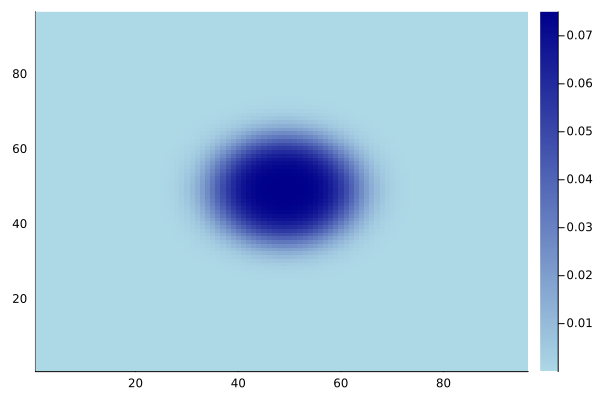

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)